In [43]:
import pandas as pd

# Crea una lista vacía para guardar los DataFrames
dfs = []

for year in range(2009, 2019):
    filename = f"data{year}.sav"
    df = pd.read_spss(filename)
    df['Year'] = year
    dfs.append(df)


# Concatena los DataFrames en uno solo
merged_df = pd.concat(dfs)

# Muestra las primeras 5 filas del DataFrame combinado
print(merged_df['año'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [44]:
merged_df.size

223970490

In [48]:
merged_df.columns

Index(['Depreg', 'mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Libras', 'Onzas', 'Diaocu', 'Mesocu', 'Añoocu', 'Sexo', 'Tipar',
       'Edadp', 'Deprep', 'muprep', 'Gretnp', 'Escivp', 'Depnap', 'Mupnap',
       'Naciop', 'Ocupap', 'Edadm', 'Deprem', 'Muprem', 'Gretnm', 'Escivm',
       'Depnam', 'Mupnam', 'Naciom', 'Ocupam', 'Asisrec', 'Sitioocu', 'Tohite',
       'Tohinm', 'Tohivi', 'año', 'mupnap', 'Escolap', 'muprem', 'grupetma',
       'mupnam', 'Escolam', 'Mupreg', 'Muprep', 'Paisrep', 'Paisnacp',
       'Paisrem', 'Paisnacm', 'munnam', 'PuebloPP', 'Ciuopad', 'PuebloPM',
       'Ciuomad', 'Munpnap', 'ciuomad', 'TipoIns', 'ViaPar'],
      dtype='object')

In [59]:
data = merged_df.loc[:, ['Depreg', 'Mupocu', 'Escolam', 'Escolap', 'año']]


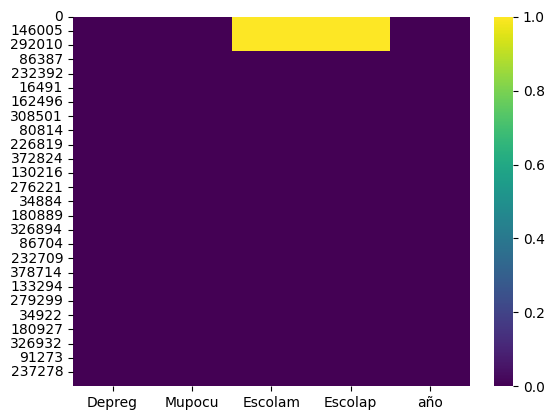

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

# Educacion en Null = no tiene educacion

In [65]:
data['Escolam'] = data['Escolam'].fillna('Ninguno')
data['Escolap'] = data['Escolap'].fillna('Ninguno')

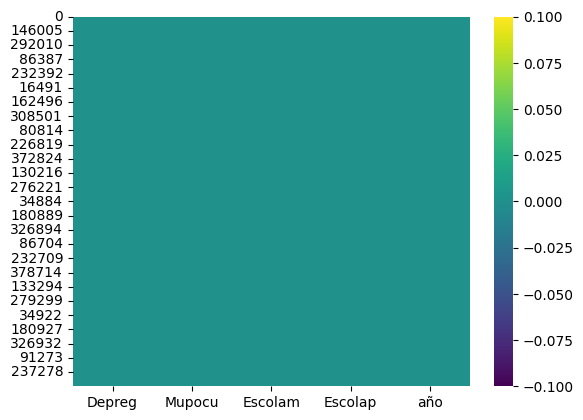

In [66]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

In [67]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Básica', 'Ignorado',
       'Primaria', 'Post Grado', 'Doctorado', 'Básico', 'Postgrado',
       'Post grado'], dtype=object)